Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import widgets

In [3]:
n_axis = np.arange(100)

In [4]:
Om = 1000
s = np.random.normal(0,1,size=(Om, n_axis.size))

<IPython.core.display.Javascript object>


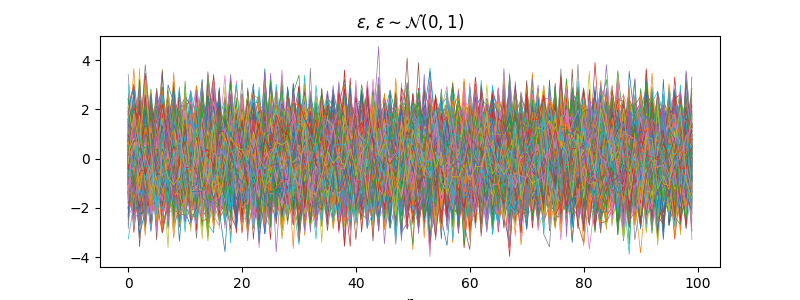

In [5]:
plt.figure(figsize=(8,3))
plt.plot(s.T, linewidth=0.5)
plt.gca().set_title('$\epsilon$, $\epsilon \sim \mathcal{N}(0, 1)$')
plt.gca().set_xlabel('$n$')

## Souborové odhady

In [6]:
n_bins = 50
pdf_all = []
edges_all = []
bin_centers_all = []

for s_n in s.T:
    pdf, edges = np.histogram(s_n, bins=n_bins, normed=True, range=[s.min(),s.max()])
    bin_centers = edges[:-1] + (edges[1:] - edges[:-1]) / 2
    pdf_all.append(pdf)
    edges_all.append(edges)
    bin_centers_all.append(bin_centers)

In [7]:
fx_all = []

for i_n, s_n in enumerate(s.T):
    fx = np.sum(s_n[:,None] < bin_centers_all[i_n][None,:], axis=0) / Om
    fx_all.append(fx)

<IPython.core.display.Javascript object>


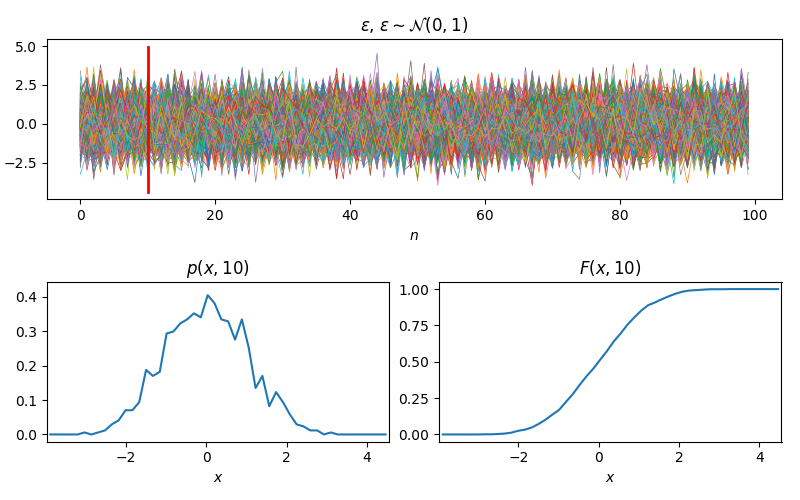

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_time>

In [8]:
f = plt.figure(figsize=(8,5))

ax0 = f.add_subplot(2,1,1)
plt0 = ax0.plot(n_axis, s.T, linewidth=0.5)
ax0.set_title('$\epsilon$, $\epsilon \sim \mathcal{N}(0, 1)$')
ax0.set_xlabel('$n$')

ymin,ymax = ax0.get_ylim()
y = np.linspace(ymin,ymax,100)
plt_redline, = ax0.plot(np.ones(y.size)*20, y, color='r', linewidth=2)

ax1 = f.add_subplot(2,2,3)
plt1, = ax1.plot(bin_centers_all[20],pdf_all[20])
#plt_scatter1 = ax1.scatter(s[:100,20], np.zeros(100), marker='+', color='g')
ax1.set_xlim([s.min(),s.max()])
ax1.set_title('$p(x,20)$')
ax1.set_xlabel('$x$')

ax2 = f.add_subplot(2,2,4)
plt2, = ax2.plot(bin_centers_all[20],fx_all[20])
#plt_scatter2 = ax2.scatter(s[:,20], np.zeros(Om), marker='+', color='g')
ax2.set_xlim([s.min(),s.max()])
ax2.set_title('$F(x,20)$')
ax2.set_xlabel('$x$')

plt.tight_layout()

def plot_time(n=10):
    plt1.set_data(bin_centers_all[n],pdf_all[n])
    plt2.set_data(bin_centers_all[n],fx_all[n])
    #plt_scatter1.set_offsets(list(zip(s[:,n],np.zeros(Om))))
    #plt_scatter2.set_offsets(list(zip(s[:,n],np.zeros(Om))))
    plt_redline.set_data(np.ones(y.size)*n, y)
    ax1.set_title(f'$p(x,{n})$')
    ax2.set_title(f'$F(x,{n})$')
    plt.draw()

widgets.interact(plot_time, 
                 n = (0,100,1))

## Časové odhady

In [9]:
n_bins = 50

pdf_time, edges_time = np.histogram(s[0,:], bins=n_bins, normed=True, range=[s.min(),s.max()])
bin_centers_time = edges_time[:-1] + (edges_time[1:] - edges_time[:-1]) / 2

fx_time = np.sum(s[0,:][:,None] < bin_centers_time[None,:], axis=0) / s.shape[1]

<IPython.core.display.Javascript object>


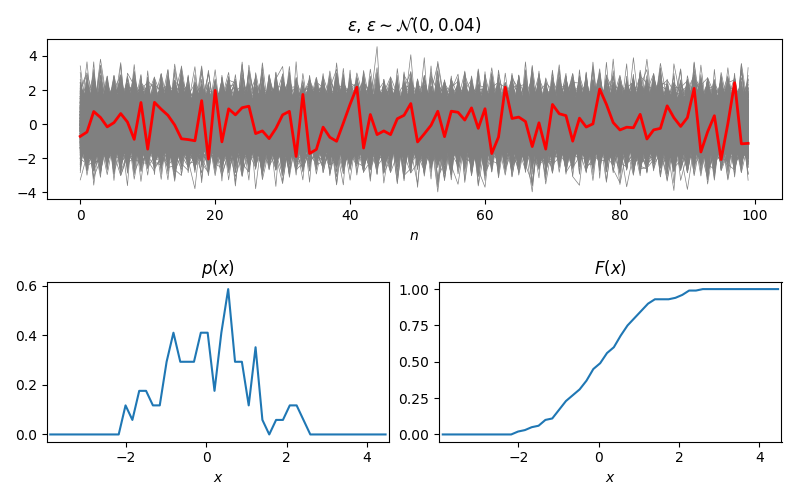

In [10]:
f = plt.figure(figsize=(8,5))

ax0 = f.add_subplot(2,1,1)
plt0 = ax0.plot(n_axis, s.T, linewidth=0.5, color='0.5')
plt01 = ax0.plot(n_axis, s.T[:,0], linewidth=2, color='r')
ax0.set_title('$\epsilon$, $\epsilon \sim \mathcal{N}(0, 0.04)$')
ax0.set_xlabel('$n$')

ax1 = f.add_subplot(2,2,3)
plt1, = ax1.plot(bin_centers_time,pdf_time)
ax1.set_xlim([s.min(),s.max()])
ax1.set_title('$p(x)$')
ax1.set_xlabel('$x$')

ax2 = f.add_subplot(2,2,4)
plt2, = ax2.plot(bin_centers_time,fx_time)
#plt_scatter2 = ax2.scatter(s[:,20], np.zeros(Om), marker='+', color='g')
ax2.set_xlim([s.min(),s.max()])
ax2.set_title('$F(x)$')
ax2.set_xlabel('$x$')

plt.tight_layout()